In [31]:
using PyPlot

In [44]:
#
# (Explicit) Runge-Kutta scheme:
# f  - rhs of differential equation
# df - Jacobian matrix of f (not used)
# t0 - Initial time
# y0 - Initial value
# h  - step length
# T  - right boundary of time interval [t0,T]
#
function Runge_Kutta(f, t0, y0, h, T)
    d = length(y0)
    N = convert(Int64, floor((T-t0)/h))
    
    t = zeros(1, N + 1)
    y = zeros(d, N + 1)
    yc = zeros(d,N + 1)
    K1= zeros(1, N + 1)
    K2= zeros(1, N + 1)
    K3= zeros(1, N + 1)
    K4= zeros(1, N + 1)
    
    
    # Initial values:
    t[1] = t0
    y[:,1] = y0
    

    for i = 1:N
        t[i+1] = t[i] + h
        K1[i]=h*f(t[i],y[i])
        K2[i]=h*f(t[i]+h/2,y[i]+K1[i]/2)
        K3[i]=h*f(t[i]+h/2,y[i]+K2[i]/2)
        K4[i]=h*f(t[i]+h,y[i]+K3[i])
        y[:,i+1] = y[:,i] + (K1[i]+2*K2[i]+2*K3[i]+K4[i])/6.
        yc[:,i]=1./(1+100*(t[i])^2)
    end
    
    return (t, y, yc-y)
end

Runge_Kutta (generic function with 1 method)

In [45]:
f(t,y)=-200*t*y^2
t0=-3
y0=1/901
h=0.0001
T=3
t,y,error=Runge_Kutta(f, t0, y0, h, T)


([-3.0 -2.9999 … 2.9999 3.0], [0.00110988 0.00110995 … 0.00110995 0.00110988], [0.0 2.1684e-19 … -4.98733e-18 -0.00110988])

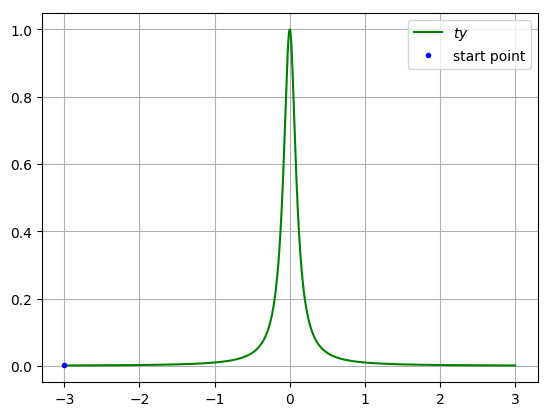

PyObject <matplotlib.legend.Legend object at 0x7f1a5fa69dd0>

In [46]:
figure()
grid()
plot(t[:], y[:],"g", label="\$t\$\$y\$")
plot(t[1],y[1],".b",label="start point")
legend()

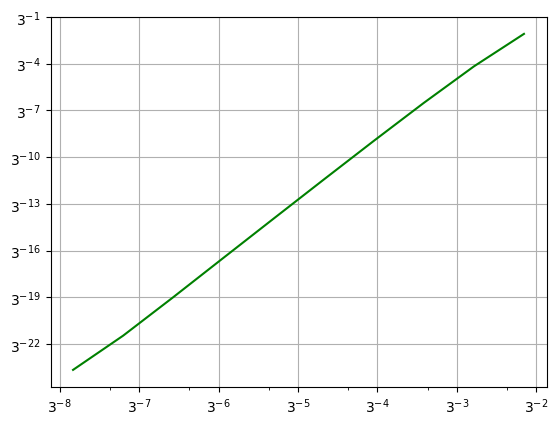

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs(::Array{Float64,1}) at ./deprecated.jl:57
 [3] macro expansion at ./In[49]:8 [inlined]
 [4] anonymous at ./<missing>:?
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /home/juser/.julia/v0.6/Compat/src/Compat.jl:464
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[49], in expression starting on line 4


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1a5f7e6990>

In [49]:
N=12
h=zeros(N)
Merror=zeros(length(h))
for i=1:length(h)
    h[i]=6/2^(i+3)
    t,y,error=Runge_Kutta(f, t0, y0, h[i], T)
    error=error[1:length(y)-1]
    Merror[i]=maximum(abs(error))
end
figure()
grid()
loglog(h, Merror[:],"g",label="\$t\$\$r\$", basex=3, basey=3)


In [36]:
function Heunbasic(h ,f ,t ,y )
    
    result= h/2 * ( f(t, y) + f( t + h, y + h * f(t, y) ) )
    
    return result
    
end

Heunbasic (generic function with 1 method)

In [37]:
function Heun( f, t0, y0, h )
    y = zeros(2)
    
    H= 2 * h
        
    t = t0 + H
    
    y[1] = y0 + Heunbasic(H,f,t0,y0)
        
    tempy = y0 + Heunbasic(h,f,t0,y0)
    
    y[2] = tempy + Heunbasic(h,f,t0+h,tempy)
    
    return (t, y)
    
end

Heun (generic function with 1 method)

In [38]:
function Heunevaluation(y ,H ,m ,ϵ ,K ,T ,ρ)
    
    #evt,evy= Heun( f, t0, y0, H/2 )
    
    τ=(y[2]-y[1])/(H^(m+1)*(1-1/(2^m)))
    
    tilth=( ϵ/ (K*T*abs(τ)) )^ (1/m)

    if  H/ρ-tilth> 1e-10
            
        newH= 2 * tilth
        
        flag = 1
    else
        newH= H
        
        flag = 0
    end
       
    return ( newH , flag )     
end

Heunevaluation (generic function with 1 method)

In [39]:
function finalstep(H ,t ,y ,m ,g)
    
    factor=2e2
    
    h=H
    
    #tnew,ynew= Heun( f, t0, y0, h)
    
    
    finaly=(2^m*y[2]-y[1])/(2^m-1)
    
    maxerror=abs(g(t)-finaly)/factor
    
    return (finaly ,t ,h , maxerror)
end

finalstep (generic function with 1 method)

In [40]:
f(t,y)=-200*t*y^2
g(t)=1/(1+100*t^2)
t0=-3
y0=1/901
h=0.01
T=6
m=2
ϵ=1e-5
K=10
newH=0
t1=0
y1=[0,0]
ρ=3
count=0

    maxerror=0
    while t0<3
        
        flag=1
        while flag==1
            t1,y1=Heun(f, t0, y0, h)
            temph=2*h
            newH,flag=Heunevaluation(y1,temph,m,ϵ,K,T,ρ)
            h=newH/2
            count=count+9
        end
    
        y0,t0,h,error=finalstep(newH,t1,y1,m,g)
        
        if maxerror<error
            maxerror=error
        end
    
    end
    println("the max error is ",maxerror," the total eva time are ", count)


the max error is 1.0820126314883271e-5 the total eva time are 154242
